# 1. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Kaggle Import

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ahsan81/job-placement-dataset

Dataset URL: https://www.kaggle.com/datasets/ahsan81/job-placement-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/3.58k [00:00<?, ?B/s]
100% 3.58k/3.58k [00:00<00:00, 8.10MB/s]


In [ ]:
!unzip job-placement-dataset.zip

Archive:  job-placement-dataset.zip
  inflating: Job_Placement_Data.csv  


# 3. Loading Data

In [ ]:
df = pd.read_csv('Job_Placement_Data.csv')

In [ ]:
df.shape

(215, 13)

In [ ]:
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [ ]:
df.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [ ]:
df.isnull().sum()

,0
gender,0
ssc_percentage,0
ssc_board,0
hsc_percentage,0
hsc_board,0
hsc_subject,0
degree_percentage,0
undergrad_degree,0
work_experience,0
emp_test_percentage,0


In [ ]:
df.duplicated().sum()

0

# 4.Plotting data

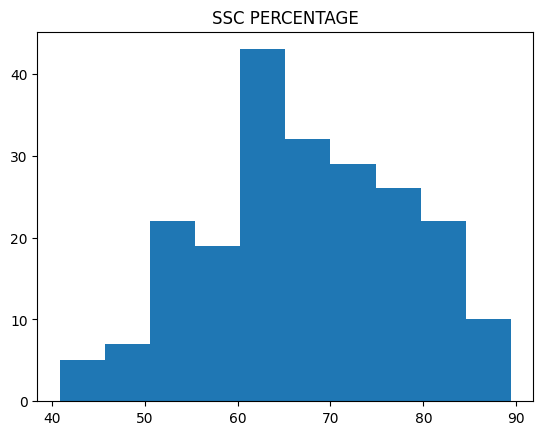

In [ ]:
plt.hist(df['ssc_percentage'])
plt.title('SSC PERCENTAGE')
plt.show()

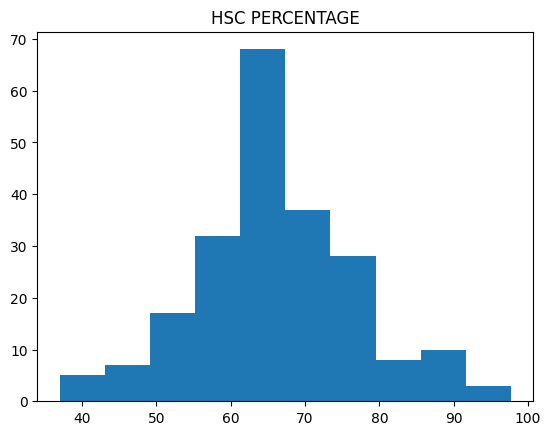

In [ ]:
plt.hist(df['hsc_percentage'])
plt.title('HSC PERCENTAGE')
plt.show()

 THE DATA IS NORMALLY DISTRIBUTED WITH LOW VARIANCE

In [ ]:
import math

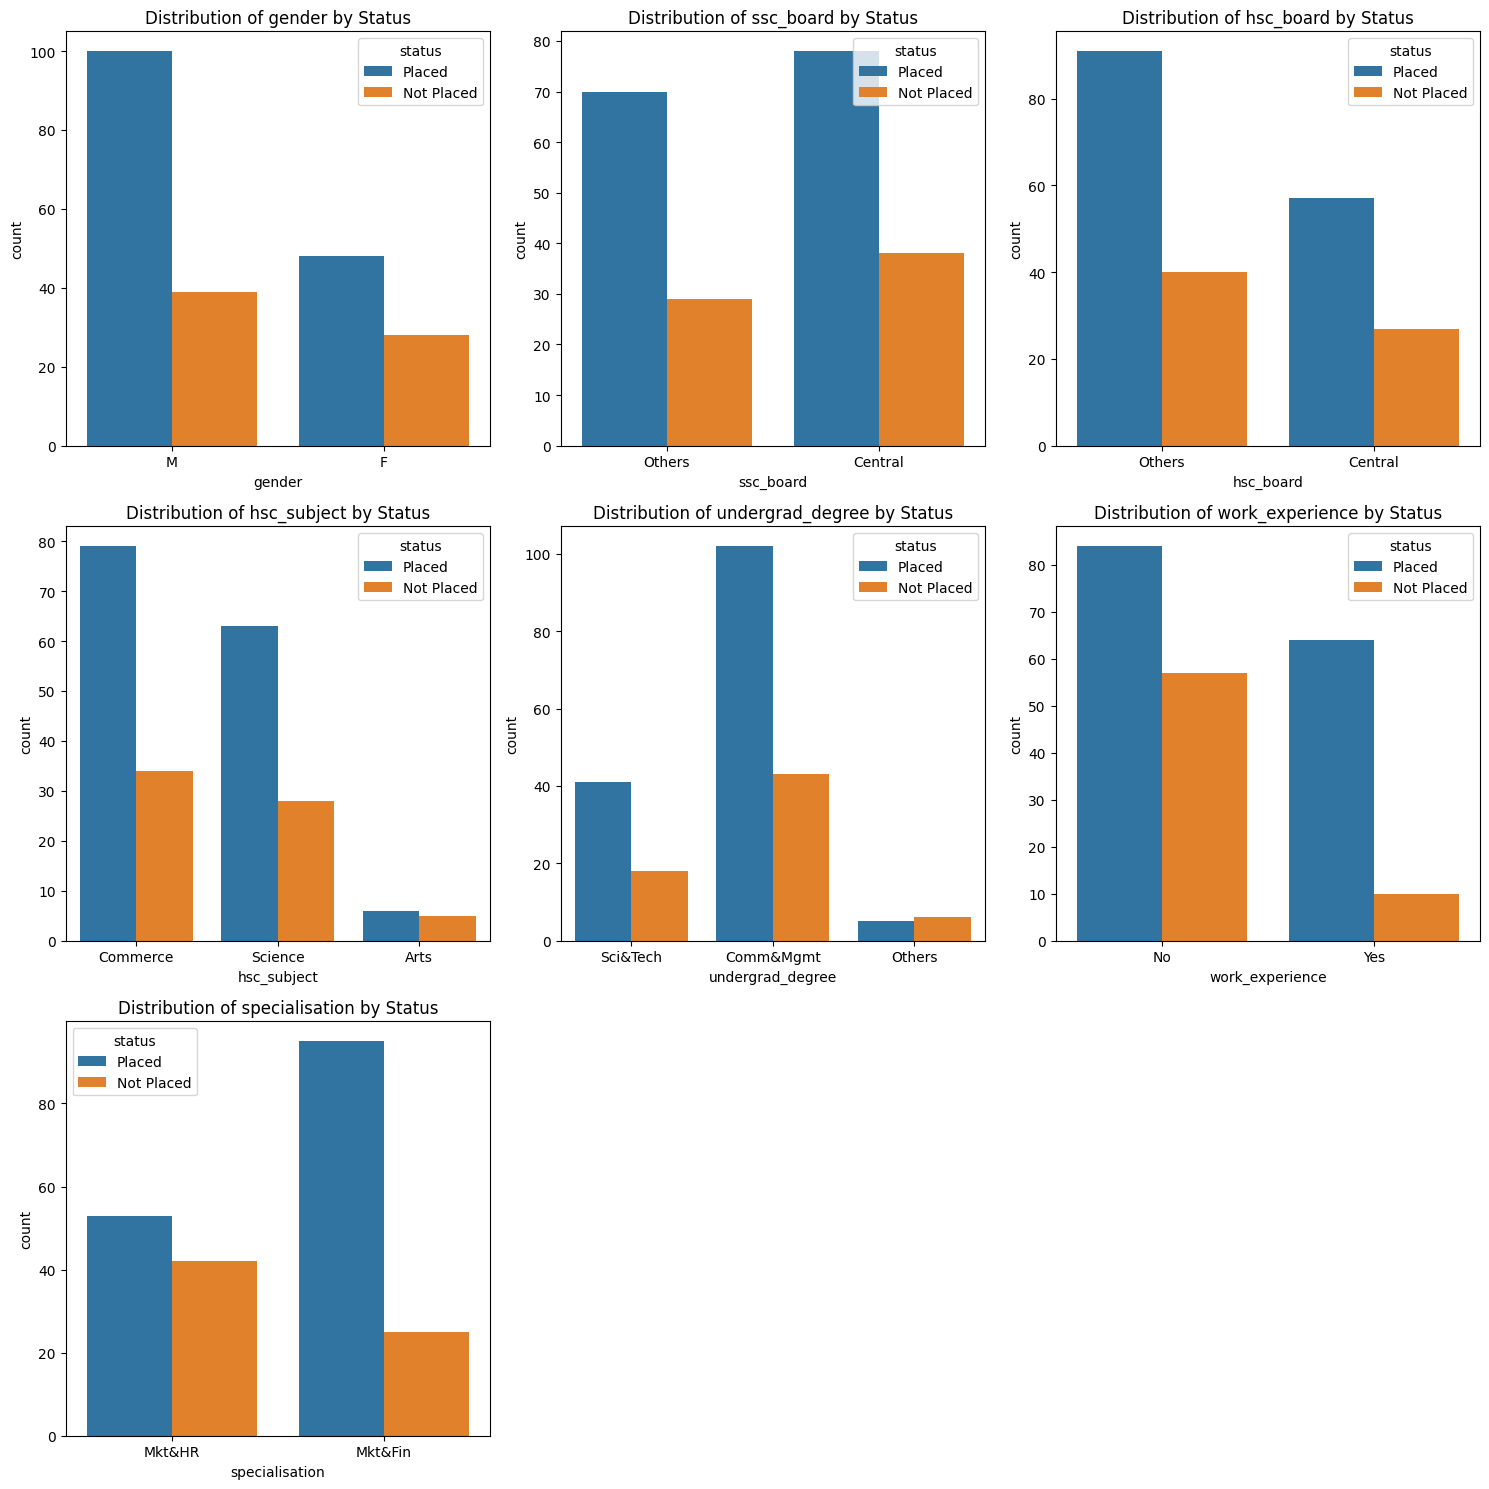

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.drop('status', errors='ignore')

num_cols = 3
num_rows = math.ceil(len(categorical_cols) / num_cols)  # Calculate required rows

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5 * num_cols, 5 * num_rows))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot bar plots
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='status', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Status')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The data is unbalanced

# 5. Data Preprocessing

In [ ]:
categorical_cols

Index(['gender', 'ssc_board', 'hsc_board', 'hsc_subject', 'undergrad_degree',
       'work_experience', 'specialisation'],
      dtype='object')

In [ ]:
categorical_cols = categorical_cols.tolist() + ['status']

In [ ]:
df2 = pd.get_dummies(df[categorical_cols], drop_first = True).astype(int)

In [ ]:
df2.head()

,gender_M,ssc_board_Others,hsc_board_Others,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech,work_experience_Yes,specialisation_Mkt&HR,status_Placed
0,1,1,1,1,0,0,1,0,1,1
1,1,0,1,0,1,0,1,1,0,1
2,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,1,0,1,0
4,1,0,0,1,0,0,0,0,0,1


In [ ]:
df2.shape

(215, 10)

In [ ]:
df_final = df.drop(columns=categorical_cols).join(df2)

In [ ]:
df_final.head()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,gender_M,ssc_board_Others,hsc_board_Others,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech,work_experience_Yes,specialisation_Mkt&HR,status_Placed
0,67.00,91.00,58.00,55.0,58.80,1,1,1,1,0,0,1,0,1,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,0,1,0,1,1,0,1
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,1,0,0,0,1,0,1,0,1,0
4,85.80,73.60,73.30,96.8,55.50,1,0,0,1,0,0,0,0,0,1


# 6. Data Splitting

In [ ]:
X = df_final.drop(columns=['status_Placed'])
y = df_final['status_Placed']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 7. Data Balancing

In [ ]:
y_train.value_counts()

,count
status_Placed,
1,121
0,51


In [ ]:
y_test.value_counts()

,count
status_Placed,
1,27
0,16


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='minority', random_state=42)

In [ ]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
y_resampled.value_counts()

,count
status_Placed,
1,121
0,121


# 8. Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lrc = LogisticRegression(max_iter=1000)
lrc.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_lrc = lrc.predict(X_test)

In [ ]:
print('Accuracy:')
print(accuracy_score(y_test, y_pred_lrc))

Accuracy:
0.8837209302325582


In [ ]:
print(classification_report(y_test, y_pred_lrc))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.92      0.89      0.91        27

    accuracy                           0.88        43
   macro avg       0.87      0.88      0.88        43
weighted avg       0.89      0.88      0.88        43



## 8.1 Fine Tunning Our Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import uniform

param_dist = {
    'C': uniform(0.01, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

random_search = RandomizedSearchCV(lrc, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)

lrc_best = random_search.best_estimator_
y_pred = lrc_best.predict(X_test)

print("Accuracy after tuning:", accuracy_score(y_test, y_pred))

Best Hyperparameters: {'C': 7.3299394181140505, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy after tuning: 0.9069767441860465


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.90      0.96      0.93        27

    accuracy                           0.91        43
   macro avg       0.91      0.89      0.90        43
weighted avg       0.91      0.91      0.91        43



Models Accuracy is very nice. Our dataset was very small still it performs very well

In [ ]:
df_final.columns

Index(['ssc_percentage', 'hsc_percentage', 'degree_percentage',
       'emp_test_percentage', 'mba_percent', 'gender_M', 'ssc_board_Others',
       'hsc_board_Others', 'hsc_subject_Commerce', 'hsc_subject_Science',
       'undergrad_degree_Others', 'undergrad_degree_Sci&Tech',
       'work_experience_Yes', 'specialisation_Mkt&HR', 'status_Placed'],
      dtype='object')

In [ ]:
X_new = pd.DataFrame([[50,50,50,50,0,0,0,0,0,0,0,0,0,0]], columns=X_train.columns)

In [ ]:
lrc_best.predict(X_new)

array([1])

In [ ]:
cols = X_train.columns
cols = list(cols)

# Exporting Model

In [ ]:
import pickle

with open('job_placement.pkl','wb') as f:
    pickle.dump(lrc_best,f)

# Exporting Columns Name

In [ ]:
import json

with open('columns_job.json','w') as f:
    json.dump(cols,f)